(least_squares) Exponential decay of Sine wave 

Estimated λ = 0.50165 ± 5.15e-03 (true 0.5)
Estimated ω = 3.14557 ± 5.16e-03 (true 3.14159)


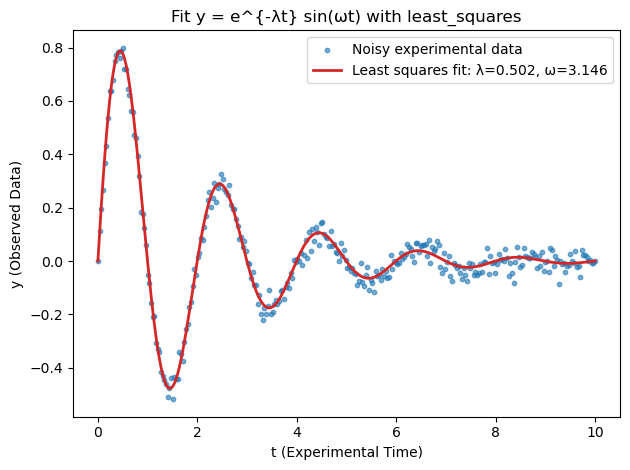

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

# --- synthetic data ---
rng = np.random.default_rng(7)
lam_true, omega_true = 0.5, np.pi
t_exp = np.linspace(0, 10, 300)  # Experimental time (independent variable)
y_true = np.exp(-lam_true * t_exp) * np.sin(omega_true * t_exp)  # True model values (no noise)
sigma = 0.03  # Known/assumed noise std (used as weight)
y_exp = y_true + rng.normal(0, sigma, size=t_exp.size)  # Noisy experimental data

# --- model: exp(-λ t) * sin(ω t) ---
def damped_sine(t, lam, omega):
    return np.exp(-lam * t) * np.sin(omega * t)

# Residuals function: difference between observed and predicted values, normalized by sigma
def residuals(x_to_optimize, t_exp, y_exp, sigma=0.03):
    lam, omega = x_to_optimize
    y_pred = damped_sine(t_exp, lam, omega)  # Predicted values from the model
    return (y_exp - y_pred) / sigma  # Normalized residuals (scaled by sigma)

# Initial guess and bounds 
p0 = np.array([1.0, 1.0])
bounds = (np.array([0.0, 0.0]), np.array([np.inf, 5.0]))

# Optimization using least_squares
res = least_squares(residuals, p0, bounds=bounds, args=(t_exp, y_exp), kwargs={"sigma": sigma})
lam_fit, omega_fit = res.x  # Estimated parameters

# --- Uncertainty via (J^T J)^{-1} scaled by residual variance ---
n = t_exp.size  # Number of data points
m = res.x.size  # Number of parameters (lam, omega)
rss = np.sum(res.fun**2)  # Residual sum of squares (weighted)
s2 = rss / max(n - m, 1)  # Residual variance estimate
J = res.jac  # Jacobian of residuals wrt parameters (n x m)
JTJ_inv = np.linalg.pinv(J.T @ J)  # Pseudo-inverse for numerical stability
pcov = s2 * JTJ_inv  # Covariance matrix
se = np.sqrt(np.diag(pcov))  # Standard errors (SE)
lam_se, omega_se = se

# Print estimated parameters with uncertainties
print(f"Estimated λ = {lam_fit:.5f} ± {lam_se:.2e} (true 0.5)")
print(f"Estimated ω = {omega_fit:.5f} ± {omega_se:.2e} (true {np.pi:.5f})")

# --- Plot ---
y_fit = damped_sine(t_exp, lam_fit, omega_fit)  # Fitted model values
plt.figure()
plt.scatter(t_exp, y_exp, s=10, alpha=0.6, label="Noisy experimental data")  # Experimental data
plt.plot(t_exp, y_fit, lw=2, label=f"Least squares fit: λ={lam_fit:.3f}, ω={omega_fit:.3f}", color="tab:red")  # Fitted curve
plt.xlabel("t (Experimental Time)")
plt.ylabel("y (Observed Data)")
plt.title("Fit y = e^{-λt} sin(ωt) with least_squares")
plt.legend()
plt.tight_layout()
plt.show()


(curve_fit) Exponential decay of Sine wave 

Estimated λ    = 0.50165 ± 5.15e-03 (true 0.5)
Estimated ω    = 3.14557 ± 5.16e-03 (true 3.14159)


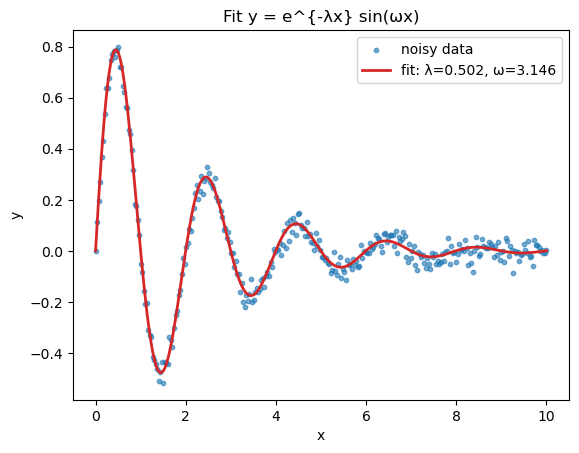

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- synthetic data ---
rng = np.random.default_rng(7)
lam_true, omega_true = 0.5, np.pi
x = np.linspace(0, 10, 300)
y_true = np.exp(-lam_true * x) * np.sin(omega_true * x)
sigma = 0.03
y = y_true + rng.normal(0, sigma, size=x.size)

# --- model: A * exp(-λ x) * sin(ω x) ---
def damped_sine(x, lam, omega):
    return np.exp(-lam * x) * np.sin(omega * x)

# --- fit (with mild bounds to keep things physical/stable) ---
p0 = (1, 1)
bounds = ((0.0, 0.0), (np.inf, 5.0))
popt, pcov = curve_fit(damped_sine, x, y, p0=p0, bounds=bounds)
lam_hat, omega_hat = popt
lam_se, omega_se = np.sqrt(np.diag(pcov))

print(f"Estimated λ    = {lam_hat:.5f} ± {lam_se:.2e} (true 0.5)")
print(f"Estimated ω    = {omega_hat:.5f} ± {omega_se:.2e} (true {np.pi:.5f})")

# --- plot ---
plt.figure()
plt.scatter(x, y, s=10, alpha=0.6, label="noisy data")
plt.plot(x, damped_sine(x, *popt), lw=2, label=f"fit: λ={lam_hat:.3f}, ω={omega_hat:.3f}", color="tab:red")
plt.xlabel("x"); plt.ylabel("y")
plt.title("Fit y = e^{-λx} sin(ωx)")
plt.legend()
plt.show()
